In [1]:
import pickle
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

In [2]:
params = {
    "font.family": 'serif',
    "font.serif": ["Computer Modern"],
    'text.usetex': True,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.labelsize': 14

   }
plt.rcParams.update(params)

In [7]:
with open("data_out/ex_1.3.pickle", "rb") as f:
#with open("data_out/ex_2.5.pickle", "rb") as f:
    rl_table, cb_table, seed_table = pickle.load(f)

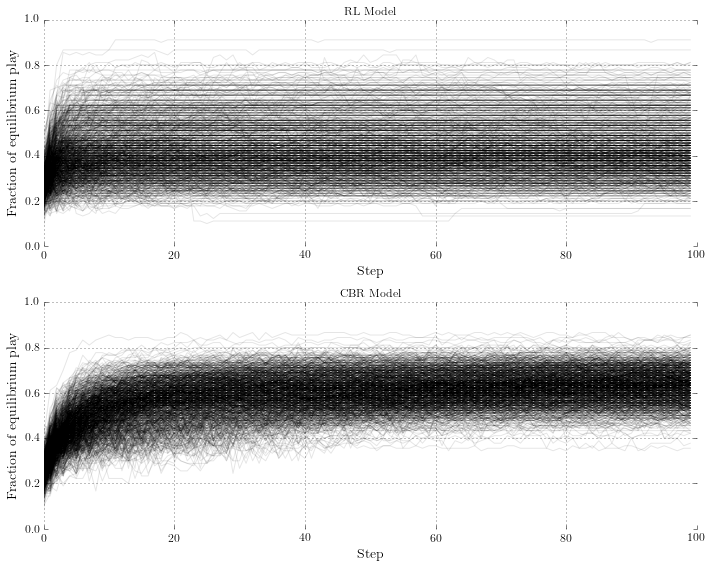

In [8]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title("RL Model")
for seed, group in rl_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax1.plot(s, c='k', alpha=0.1)
    ax1.grid(True)
    ax1.set_xlabel("Step")
    ax1.set_ylabel("Fraction of equilibrium play")
    ax1.set_ylim(0, 1)

ax2.set_title("CBR Model")
for seed, group in cb_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax2.plot(s, c='k', alpha=0.1)
    ax2.grid(True)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("Fraction of equilibrium play")
    ax2.set_ylim(0, 1)

for ax in [ax1, ax2]:
    for spine in ["top", "left", "right", "bottom"]:
        ax.spines[spine].set_visible(False)
    
fig.tight_layout()

In [9]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/WarReason/Figures/"
fig.savefig(PATH + "SC_1_traces.pdf")

In [10]:
fig.savefig(PATH + "SC_1_traces.png", dpi=300)

In [4]:
def get_mean(group):
    return len(group[(group.Step>50) & (group.quality==1)])/len(group[group.Step>50])

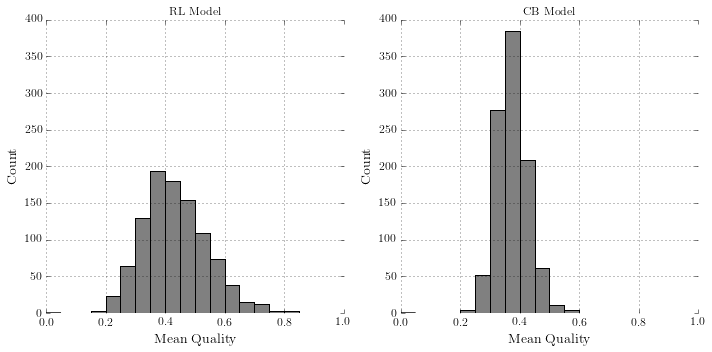

In [30]:
rl_means = rl_table.groupby("Seed").aggregate(get_mean)["quality"]
cb_means = cb_table.groupby("Seed").aggregate(get_mean)["quality"]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

rl_means.hist(ax=ax1, bins=np.linspace(0, 1, 21), color='grey')
cb_means.hist(ax=ax2, bins=np.linspace(0, 1, 21), color='grey')

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 400)
#ax1.set_ylim(0, 250)
ax2.set_xlim(0, 1)

ax1.set_title("RL Model")
ax2.set_title("CB Model")

ax1.set_xlabel("Mean Quality")
ax2.set_xlabel("Mean Quality")
ax1.set_ylabel("Count")
ax2.set_ylabel("Count")


for ax in [ax1, ax2]:
    for spine in ["top", "left", "right", "bottom"]:
        ax.spines[spine].set_visible(False)
    
fig.tight_layout()

In [8]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/WarReason/Figures/"
fig.savefig(PATH + "SC_2_histograms.pdf")

In [32]:
both_means = pd.DataFrame({"RL": rl_means, "CB": cb_means})
both_means["Delta"] = both_means.CB - both_means.RL

In [33]:
both_means.Delta.max()

0.38208616780045357

In [37]:
both_means.Delta.min()

-0.47619047619047622

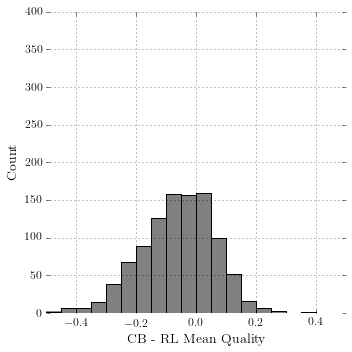

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))
both_means.Delta.hist(ax=ax, bins=np.linspace(-0.5, 0.5, 21), color='grey') # Ex 2
#both_means.Delta.hist(ax=ax, bins=np.linspace(-0.4, 0.6, 21), color='grey') # Ex 1

ax.set_xlabel("CB - RL Mean Quality")
ax.set_ylabel("Count")
ax.set_ylim(0, 400)
#ax.set_xlim(-0.4, 0.6)
ax.set_xlim(-0.5, 0.5)
for spine in ["top", "left", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
    
fig.tight_layout()

In [41]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/WarReason/Figures/"
fig.savefig(PATH + "SC_2_deltas.pdf")

In [42]:
rl_qualities = rl_table.groupby("Seed").aggregate(get_mean)["quality"].reset_index().\
    merge(seed_table, on="Seed")
    
cb_qualities = cb_table.groupby("Seed").aggregate(get_mean)["quality"].reset_index().\
    merge(seed_table, on="Seed")

In [43]:
rl_qualities.rename(columns={"learning_rate": "Learning Rate"}, inplace=True)
cb_qualities.rename(columns={"learning_rate": "Learning Rate"}, inplace=True)

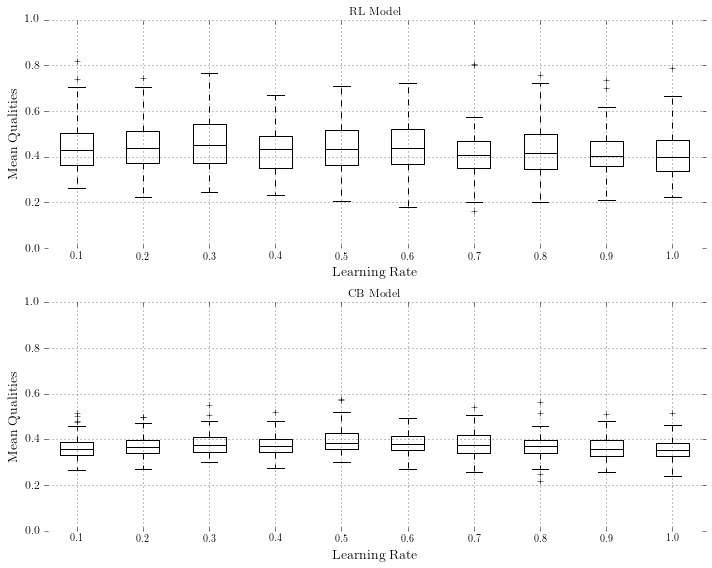

In [44]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

bw = rl_qualities.boxplot(column='quality', by='Learning Rate', ax=ax1, return_type='dict')
#for key in ["boxes", "whiskers", "medians"]:
for key in bw["quality"]:
    plt.setp(bw["quality"][key], color="k")


bw = cb_qualities.boxplot(column='quality', by='Learning Rate', ax=ax2, return_type='dict')
#for key in ["boxes", "whiskers", "medians"]:
for key in bw["quality"]:
    plt.setp(bw["quality"][key], color="k")

ax1.set_title("RL Model")
ax2.set_title("CB Model")

ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)

for ax in [ax1, ax2]:
    for spine in ["top", "left", "right", "bottom"]:
        ax.spines[spine].set_visible(False)

ax1.set_ylabel("Mean Qualities")
ax2.set_ylabel("Mean Qualities")
fig.suptitle("")
fig.tight_layout()

In [45]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/WarReason/Figures/"
fig.savefig(PATH + "SC_2_boxwhiskers.pdf")